In [1]:
# Ready to coding 
 ##필요한 설정들 
    options(warn = -1) ## 경고 지우기
    options(repr.plot.width=8, repr.plot.height=6) # 플랏 크기 조절
    Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8") # 한글 설정
    library(stringr) # stringr 불러오기
    library(dplyr) # dplyr 불러오기
    par(family ="AppleGothic",bg='grey') # 그래프 배경및 한글설정
checkData <- function(data){
       options(warn = -1) ## 경고 지우기
    options(repr.plot.width=8, repr.plot.height=6) # 플랏 크기 조절
    Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8") # 한글 설정
    library(stringr) # stringr 불러오기
    library(dplyr) # dplyr 불러오기
    par(family ="AppleGothic",bg='grey') # 그래프 배경및 한글설정
    
    cat("*****************(1.DATA HEAD)*****************\n\n");
        print(head(data,2))
    cat("******************************************************************\n\n");
    cat("*****************(2.DATA TAIL)*****************\n\n");
        print(tail(data,2))
    cat("******************************************************************\n\n");
    cat("*****************(3.DATA Structure)*****************\n\n");
        str(data)
    cat("******************************************************************\n\n");
    # test 의 기본 통계량 보기
    cat("*****************(4.DATA Summary)*****************\n\n");
        print(summary(data))
    cat("******************************************************************\n\n");
    cat("*****************(5.NA check)*****************\n\n");
        cat(" 5.1 Data 전체에서의 NA 개수:", sum(is.na(data)),"\n\n")
        # 컬럼 별 na 확인
        cat(" 5.2 Column 별 NA check \n")
        for(i in 1:ncol(data)){
            cat("  col[",colnames(data[i]), "] --> NA 개수:",(sum(is.na(data[,i]))),"\n")
        }
        ## 컬럼별 na 합계 계산. 
        cat("column 별 na 합계 \n",colSums(is.na(data)) ,"\n")
    cat("******************************************************************\n\n");
    cat("*****************(6.Colum 별 data 빈도수 형평성 검사)*****************\n\n");
    #A 컬럼의 최대값 최소값 빈도수
    for(i in 1:ncol(data)){
        #cat("-----",colnames(test)[i] ," 컬럼의 빈도 분석결과----- \n")
        cat("최빈값:",max(table(data[,i])), "최소빈도값 :", min(table(data[,i])), "\n")
        barplot(table(data[,i]),

            main = paste(colnames(data)[i] ," 컬럼의 데이터 별 빈도 분석 \n"),
            ylab = "빈도수",
            xlab = "데이터값",
        )
        
        cat("\n")
        # 각 컬럼의 빈도수의 최대값, 최소값 구하기 
        cat(colnames(data)[i],"컬럼의 빈도수의 최대값과 최소값\n")

    }
    
 
}

## 결측치 보상 함수 
replaceNa <-function(data){
    #data 는 vector 

    # 결측치를 무조건 제거하면 통계량을 얻을수 없으며, 데이터 손실로 문제 발생
    # 1)결측치를 제거하고 평균구하기
    meanDeleteNa <-mean(data,na.rm = T)
    cat( " >> 결측치를 제거후 평균 : ", meanDeleteNa)

    # 2) NA를 0 으로 대체하여 평균구해보기 
    meanRepZero <-mean(ifelse(is.na(data),0,data))
    cat( "\n >> 결측치를 0으로 대체후 평균 : ", meanRepZero)

    # 3) NA 를 중앙값으로 대체하여 평균구해보기
    meanRepMedian <- mean(ifelse(is.na(data),median(data,na.rm = T),data))
    cat("\n >> 결측치를 중앙값(", median(data,na.rm = T),")으로 대체후 평균: ", meanRepMedian,sep="" )

    # 4) NA 를 최소값으로 대체하여 평균 구해보기
    meanRepMin <- mean(ifelse(is.na(data), min(data,na.rm = T),data))
    cat("\n >> 결측치를 최소값(",min(data,na.rm = T), ")으로 대체후 평균 : ",meanRepMin,sep="" )

    meanRepMax <- mean(ifelse(is.na(data), max(data,na.rm = T),data))
    cat("\n >> 결측치를 최대값(",max(data,na.rm = T), ")으로 대체후 평균 : ",meanRepMax,sep="" )
    
    meanRep1Qt <-mean(ifelse(is.na(data), quantile(data,0.25,na.rm = T),data))
    cat("\n >> 결측치를 1사분위(",quantile(data,0.25,na.rm = T), ")으로 대체후 평균 : ",meanRep1Qt,sep="" )

    meanRep2Qt <-mean(ifelse(is.na(data), quantile(data,0.5,na.rm = T),data))
    cat("\n >> 결측치를 2사분위(",quantile(data,0.5,na.rm = T), ")으로 대체후 평균 : ",meanRep2Qt,sep="" )

    meanRep3Qt <-mean(ifelse(is.na(data), quantile(data,0.75,na.rm = T),data))
    cat("\n >> 결측치를 3사분위(",quantile(data,0.75,na.rm = T), ")으로 대체후 평균 : ",meanRep3Qt,sep="" )

    meanRep4Qt <-mean(ifelse(is.na(data), quantile(data,1,na.rm = T),data))
    cat("\n >> 결측치를 4사분위(",quantile(data,1,na.rm = T), ")으로 대체후 평균 : ",meanRep4Qt,sep="" )
    
    ## 최적 결측치 대체 값 계산
    meanReps<-c(meanRep1Qt,meanRep2Qt,meanRep3Qt,meanRep4Qt,meanRepMax,meanRepMin,meanRepMedian,meanRepZero)
    names(meanReps)<-c("1사분위","2사분위","3사분위","4사분위","최대값","최소값","중앙값","0")
    minimum_meanReps<-min(abs(meanReps-mean(data,na.rm = T)))
    meanRepOptimum <-sum(ifelse(abs(meanReps-mean(data,na.rm = T)) == minimum_meanReps,meanReps,0))
    cat ("\n")
    meanRepOptName<-names(meanReps)[which(meanReps== meanRepOptimum)]
    cat("\n >> 최적 대체 => ",meanRepOptName ,"(",meanRepOptimum ,")")


}
#replaceNa(data)


#checkData(test)

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
## Legend 세팅 함수
setLegend <- function(x,y,xpos,ypos){
    legend(
        trunc(x[,1][trunc(length(x[,1])*xpos)]), # x location of legend
        max(y)*ypos, # y location of legend
        c("Female","Male"),
        #lty= c(1,2),
        fill =c("orange","blue"),
    )
}

*****************(1.DATA HEAD)*****************

  Name Gender Count                   Year Year.Rank
1 Mary      F  7065 01/01/1880 12:00:00 AM         1
2 Anna      F  2604 01/01/1880 12:00:00 AM         2
******************************************************************

*****************(2.DATA TAIL)*****************

         Name Gender Count                   Year Year.Rank
1825387 Zyran      M     5 01/01/2014 12:00:00 AM     13976
1825388 Zyrin      M     5 01/01/2014 12:00:00 AM     13977
******************************************************************

*****************(3.DATA Structure)*****************

'data.frame':	1825388 obs. of  5 variables:
 $ Name     : chr  "Mary" "Anna" "Emma" "Elizabeth" ...
 $ Gender   : chr  "F" "F" "F" "F" ...
 $ Count    : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ Year     : chr  "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" ...
 $ Year.Rank: int  1 2 3 4 5 6 7 8 9 1

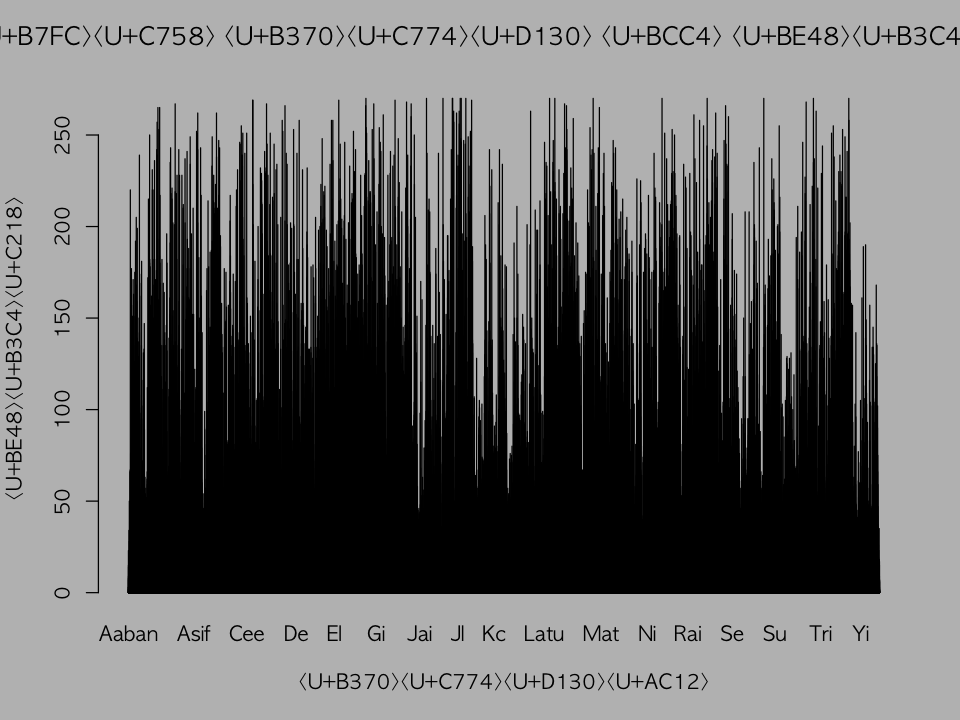


Gender <U+CEEC><U+B7FC><U+C758> <U+BE48><U+B3C4><U+C218><U+C758> <U+CD5C><U+B300><U+AC12><U+ACFC> <U+CD5C><U+C18C><U+AC12>
<U+CD5C><U+BE48><U+AC12>: 254602 <U+CD5C><U+C18C><U+BE48><U+B3C4><U+AC12> : 1 


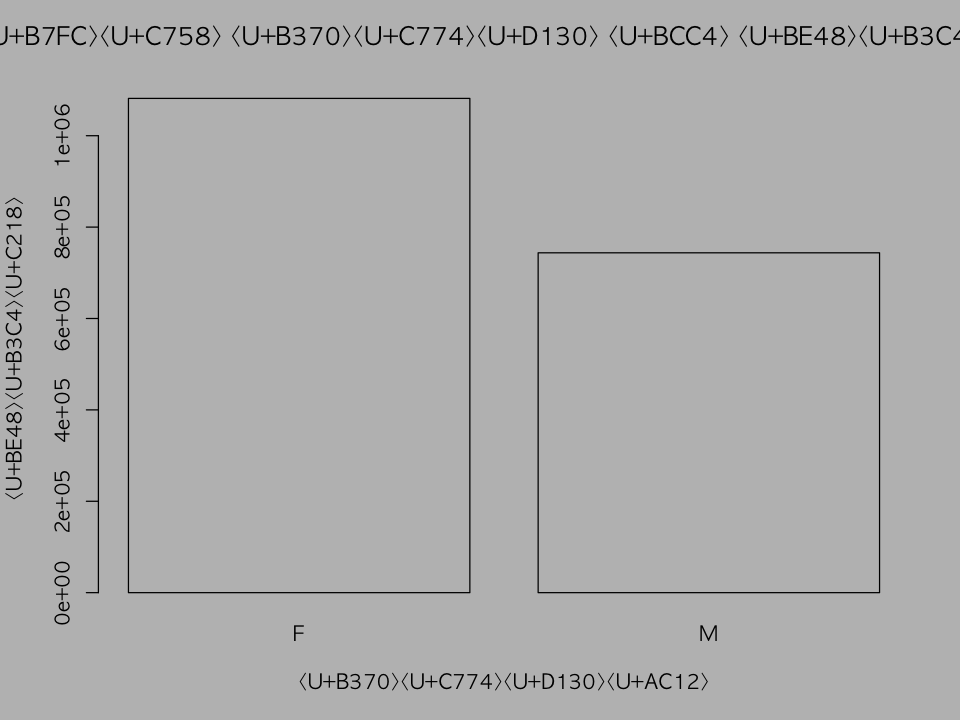


Count <U+CEEC><U+B7FC><U+C758> <U+BE48><U+B3C4><U+C218><U+C758> <U+CD5C><U+B300><U+AC12><U+ACFC> <U+CD5C><U+C18C><U+AC12>
<U+CD5C><U+BE48><U+AC12>: 35045 <U+CD5C><U+C18C><U+BE48><U+B3C4><U+AC12> : 1935 


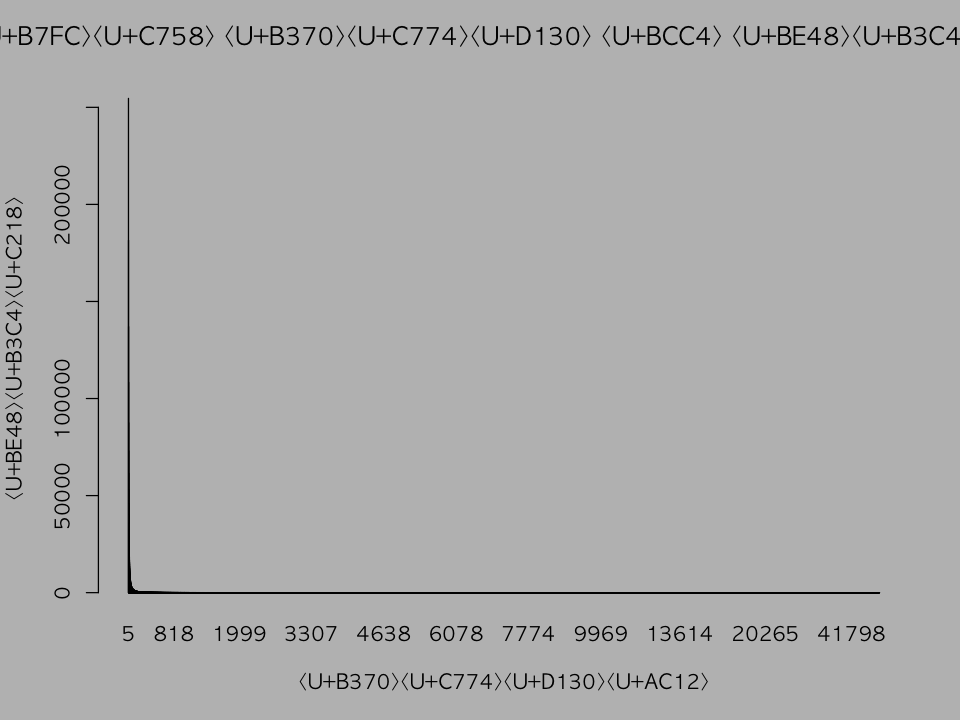


Year <U+CEEC><U+B7FC><U+C758> <U+BE48><U+B3C4><U+C218><U+C758> <U+CD5C><U+B300><U+AC12><U+ACFC> <U+CD5C><U+C18C><U+AC12>
<U+CD5C><U+BE48><U+AC12>: 268 <U+CD5C><U+C18C><U+BE48><U+B3C4><U+AC12> : 1 


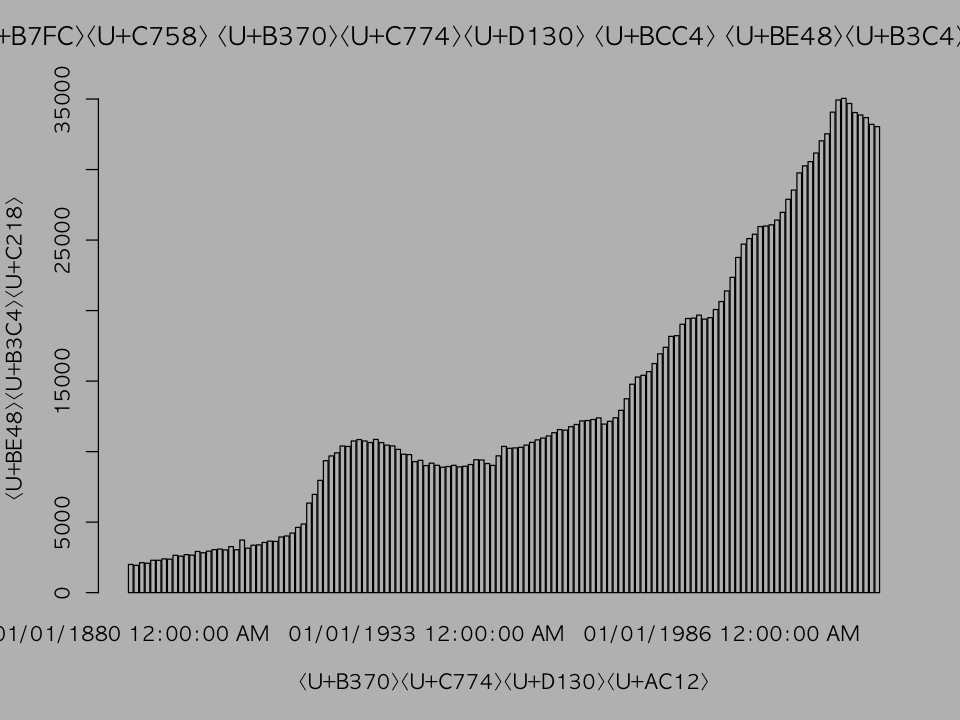


Year.Rank <U+CEEC><U+B7FC><U+C758> <U+BE48><U+B3C4><U+C218><U+C758> <U+CD5C><U+B300><U+AC12><U+ACFC> <U+CD5C><U+C18C><U+AC12>


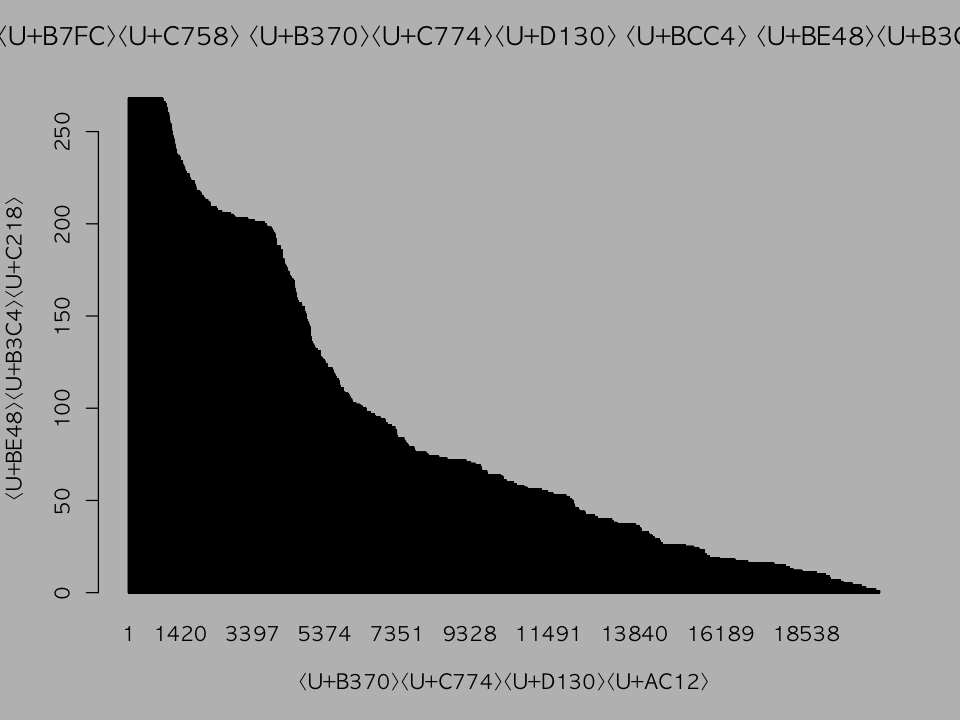

In [3]:
baby<-read.csv("../Data/R_Baby_Names_1880-2014.csv")
checkData(baby)

In [4]:
head(baby)

# baby year 부분 정제, 연도만 필요함. 
baby$Year<-as.integer(substr(baby$Year,7,10))
head(baby)


,Name,Gender,Count,Year,Year.Rank
,<chr>,<chr>,<int>,<chr>,<int>
1,Mary,F,7065,01/01/1880 12:00:00 AM,1
2,Anna,F,2604,01/01/1880 12:00:00 AM,2
3,Emma,F,2003,01/01/1880 12:00:00 AM,3
4,Elizabeth,F,1939,01/01/1880 12:00:00 AM,4
5,Minnie,F,1746,01/01/1880 12:00:00 AM,5
6,Margaret,F,1578,01/01/1880 12:00:00 AM,6


,Name,Gender,Count,Year,Year.Rank
,<chr>,<chr>,<int>,<int>,<int>
1,Mary,F,7065,1880,1
2,Anna,F,2604,1880,2
3,Emma,F,2003,1880,3
4,Elizabeth,F,1939,1880,4
5,Minnie,F,1746,1880,5
6,Margaret,F,1578,1880,6


In [5]:
#정제된 변수를 File로 저장하여 크기비교하기
write.csv(baby , "../Data/baby.csv", row.names = F)

In [6]:
# baby 에서 여자아이만 Female 이라는 Dataset을 만들고 row수 구하기 

Female <-subset(baby , Gender =="F")
head(arrange(Female,desc(Count)))
cat("여자이름 수: ", nrow(Female))

# 여자아이 이름 중 유일한 이름만 20개 찾기 
head(unique(Female$Name),20)

,Name,Gender,Count,Year,Year.Rank
,<chr>,<chr>,<int>,<int>,<int>
1,Linda,F,99680,1947,1
2,Linda,F,96205,1948,1
3,Linda,F,91010,1949,1
4,Linda,F,80431,1950,1
5,Mary,F,73985,1921,1
6,Linda,F,73933,1951,1


여자이름 수:  1081660

[1] "Mary"      "Anna"      "Emma"      "Elizabeth" "Minnie"    "Margaret" 
 [7] "Ida"       "Alice"     "Bertha"    "Sarah"     "Annie"     "Clara"    
[13] "Ella"      "Florence"  "Cora"      "Martha"    "Laura"     "Nellie"   
[19] "Grace"     "Carrie"

In [7]:
# 여자아이 이름 종류의 개수
length(unique(Female$Name))

[1] 64911

In [8]:
# 가장 많이 사용된 이름 Top 10 구하기
#head(baby)
n<-head(arrange(aggregate(Count~Name, Female, sum), desc(Count)),10)

rownames(n)<-n[,1]
n<-n[-1]
rownames(n)
par(bg = "grey")
barplot(as.matrix(n),
         beside = T ,
         col= rainbow(rownames(n))
         )
         


[1] "Mary"      "Elizabeth" "Patricia"  "Jennifer"  "Linda"     "Barbara"  
 [7] "Margaret"  "Susan"     "Dorothy"   "Sarah"

ERROR: Error in if ((n <- as.integer(n[1L])) > 0) {: TRUE/FALSE가 필요한 곳에 값이 없습니다


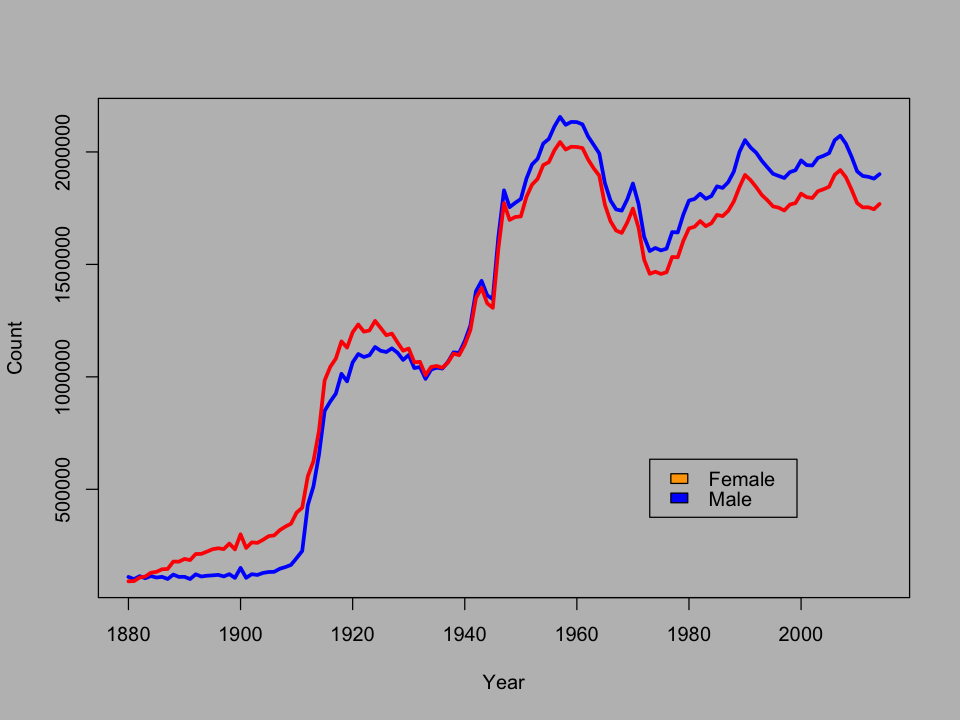

In [15]:
# 연도별 남자 여자 합계로 선그래프 만들기. Plot, lines.. 
Male <- subset(baby, Gender=="M")
population_Female<-aggregate(Count~Year, Female,sum)
population_Male<-aggregate(Count~Year, Male,sum)
#population_Mmale
par(bg="grey")
plot(population_Male,
    type= "l",
    col = "blue",
    legend.text =T,
    lwd =3
    
)
lines(population_Female,
    col ="red",
    lwd =3
)
setLegend(population_Female,population_Female$Count,0.7,0.31)
